In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
url = "/content/drive/MyDrive/BitcoinHeistData.csv"
data = pd.read_csv(url)
data.drop("address",axis = 1,inplace = True)
data = data.sample(frac = 1,random_state = 1).reset_index()
print(data.isnull())
scaler = StandardScaler()
X = data.iloc[:,:-1].values
X = scaler.fit_transform(X)
Y = data.iloc[:,-1].values
Y = np.reshape(Y,(-1,1))

In [4]:
def train_validate_test_split(X,Y):
  X_shape = X.shape
  Y_shape = Y.shape
  X_size = X_shape[0];
  Y_size = Y_shape[0];
  seventyPercent = 0.7 *X_size
  eightPercent = 0.85*X_size;
  X_train = X[0:int(seventyPercent),:]
  Y_train = Y[0:int(seventyPercent),:]
  X_validate = X[int(seventyPercent):int(eightPercent),:]
  Y_validate = Y[int(seventyPercent):int(eightPercent),:]
  X_test = X[int(eightPercent):,:]
  Y_test = Y[int(eightPercent):,:]
  arr = []
  arr.append(X_train)
  arr.append(X_validate)
  arr.append(X_test)
  arr.append(Y_train)
  arr.append(Y_validate)
  arr.append(Y_test)
  return arr

In [5]:
a = train_validate_test_split(X,Y);
X_train = a[0]
X_validate = a[1]
X_test = a[2]
Y_train = a[3]
Y_validate = a[4]
Y_test = a[5]

Gini Criterion

Accuracy Score For Validate (max depth = 4) : 0.9980183083621902
Precision Score For Validate (max depth = 4) : 0.9980183083621902
Recall Score For Validate (max depth = 4) : 0.9980183083621902
Accuracy Score For Test (max depth = 4) : 0.997940594964629
Precision Score For Test (max depth = 4) : 0.997940594964629
Recall Score For Test (max depth = 4) : 0.997940594964629

Accuracy Score For Validate (max depth = 8) : 0.9993508645615479
Precision Score For Validate (max depth = 8) : 0.9993508645615479
Recall Score For Validate (max depth = 8) : 0.9993508645615479
Accuracy Score For Test (max depth = 8) : 0.999318864927258
Precision Score For Test (max depth = 8) : 0.999318864927258
Recall Score For Test (max depth = 8) : 0.999318864927258

Accuracy Score For Validate (max depth = 10) : 0.9994628632815625
Precision Score For Validate (max depth = 10) : 0.9994628632815625
Recall Score For Validate (max depth = 10) : 0.9994628632815625
Accuracy Score For Test (max depth = 10) : 0.9994697203

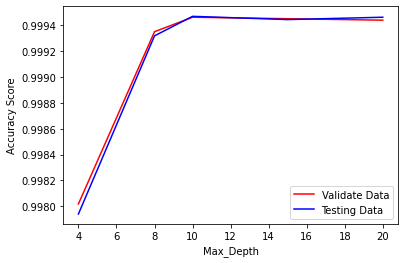

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import *
arr = [4,8,10,15,20]
validate_plot = []
test_plot = []
for i in arr:
  model = DecisionTreeClassifier(max_depth = i)  # default gini
  model = model.fit(X_train,Y_train)
  pred_validate = model.predict(X_validate)
  pred_test = model.predict(X_test)
  accuracy_score_validate = accuracy_score(Y_validate,pred_validate)
  recall_score_validate = recall_score(Y_validate,pred_validate,average = "micro")
  precision_score_validate = precision_score(Y_validate,pred_validate,average = "micro")
  accuracy_score_test = accuracy_score(Y_test,pred_test)
  recall_score_test = recall_score(Y_test,pred_test,average = "micro")
  precision_score_test = precision_score(Y_test,pred_test,average = "micro")
  validate_plot.append(accuracy_score_validate)
  test_plot.append(accuracy_score_test)
  print("Accuracy Score For Validate (max depth = " + str(i) + ") : " + str(accuracy_score_validate))
  print("Precision Score For Validate (max depth = " + str(i) + ") : " + str(precision_score_validate))
  print("Recall Score For Validate (max depth = " + str(i) + ") : " + str(recall_score_validate))
  print("Accuracy Score For Test (max depth = " + str(i) + ") : " + str(accuracy_score_test))
  print("Precision Score For Test (max depth = " + str(i) + ") : " + str(precision_score_test))
  print("Recall Score For Test (max depth = " + str(i) + ") : " + str(recall_score_test))
  print()
plt.xlabel("Max_Depth")
plt.ylabel("Accuracy Score")
plt.plot(arr,validate_plot,'r',label = "Validate Data")
plt.plot(arr,test_plot,'b',label = "Testing Data")
plt.legend()

Criteria Entropy

Accuracy Score For Validate (max depth = 4) : 0.9980183083621902
Precision Score For Validate (max depth = 4) : 0.9980183083621902
Recall Score For Validate (max depth = 4) : 0.9980183083621902
Accuracy Score For Test (max depth = 4) : 0.997940594964629
Precision Score For Test (max depth = 4) : 0.997940594964629
Recall Score For Test (max depth = 4) : 0.997940594964629

Accuracy Score For Validate (max depth = 8) : 0.9993577216260385
Precision Score For Validate (max depth = 8) : 0.9993577216260385
Recall Score For Validate (max depth = 8) : 0.9993577216260385
Accuracy Score For Test (max depth = 8) : 0.9993577216260385
Precision Score For Test (max depth = 8) : 0.9993577216260385
Recall Score For Test (max depth = 8) : 0.9993577216260385

Accuracy Score For Validate (max depth = 10) : 0.9994925772276888
Precision Score For Validate (max depth = 10) : 0.9994925772276888
Recall Score For Validate (max depth = 10) : 0.9994925772276888
Accuracy Score For Test (max depth = 10) : 0.9994994

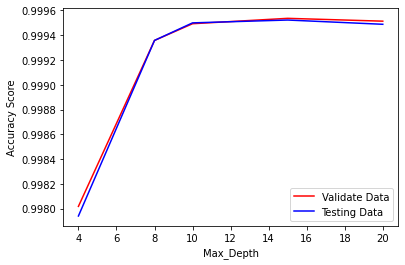

In [11]:
validate_plot = []
test_plot = []
for i in arr:
  model = DecisionTreeClassifier(max_depth = i,criterion = "entropy")
  model = model.fit(X_train,Y_train)
  pred_validate = model.predict(X_validate)
  pred_test = model.predict(X_test)
  accuracy_score_validate = accuracy_score(Y_validate,pred_validate)
  recall_score_validate = recall_score(Y_validate,pred_validate,average = "micro")
  precision_score_validate = precision_score(Y_validate,pred_validate,average = "micro")
  accuracy_score_test = accuracy_score(Y_test,pred_test)
  recall_score_test = recall_score(Y_test,pred_test,average = "micro")
  precision_score_test = precision_score(Y_test,pred_test,average = "micro")
  validate_plot.append(accuracy_score_validate)
  test_plot.append(accuracy_score_test)
  print("Accuracy Score For Validate (max depth = " + str(i) + ") : " + str(accuracy_score_validate))
  print("Precision Score For Validate (max depth = " + str(i) + ") : " + str(precision_score_validate))
  print("Recall Score For Validate (max depth = " + str(i) + ") : " + str(recall_score_validate))
  print("Accuracy Score For Test (max depth = " + str(i) + ") : " + str(accuracy_score_test))
  print("Precision Score For Test (max depth = " + str(i) + ") : " + str(precision_score_test))
  print("Recall Score For Test (max depth = " + str(i) + ") : " + str(recall_score_test))
  print()
plt.xlabel("Max_Depth")
plt.ylabel("Accuracy Score")
plt.plot(arr,validate_plot,'r',label = "Validate Data")
plt.plot(arr,test_plot,'b',label = "Testing Data")
plt.legend()

2 Ensembling

In [12]:
new_train_size = int(.5*X_train.shape[0])
data_new = np.concatenate((X_train, Y_train), axis=1)
new_pred_test = []
new_pred_val = []
for _ in range (100):
  dataset = data_new[np.random.choice(data_new.shape[0],new_train_size,replace=True),:]
  X_t = dataset[:,:-1];
  Y_t = np.reshape(dataset[:,-1],(-1,1))
  model = DecisionTreeClassifier(max_depth=3,criterion="entropy")
  model = model.fit(X_t,Y_t)
  pred_test = model.predict(X_test)
  pred_validate = model.predict(X_validate)
  new_pred_val.append(pred_validate)
  new_pred_test.append(pred_test)

In [13]:
Y_pred_validate = []
Y_pred_test = []
for i in range(437505):
  d = {}
  d1 = {}
  for j in range(100):
    d[new_pred_val[j][i]] = d.get(new_pred_val[j][i], 0) + 1
    d1[new_pred_test[j][i]] = d1.get(new_pred_test[j][i], 0) + 1
  val_predict = max(zip(d.values(), d.keys()))[1]
  test_predict = max(zip(d1.values(), d1.keys()))[1]
  Y_pred_validate.append(val_predict)
  Y_pred_test.append(test_predict)

In [14]:
Y_pred_validate = np.reshape(Y_pred_validate,(-1,1))
Y_pred_test = np.reshape(Y_pred_test,(-1,1))

In [15]:
accuracy_score_validate = accuracy_score(Y_validate,Y_pred_validate)
recall_score_validate = recall_score(Y_validate,Y_pred_validate,average = "micro")
precision_score_validate = precision_score(Y_validate,Y_pred_validate,average = "micro")
accuracy_score_test = accuracy_score(Y_test,Y_pred_test)
recall_score_test = recall_score(Y_test,Y_pred_test,average = "micro")
precision_score_test = precision_score(Y_test,Y_pred_test,average = "micro")
print("Accuracy Score For Validate : " + str(accuracy_score_validate))
print("Precision Score For Validate : " + str(precision_score_validate))
print("Recall Score For Validate : " + str(recall_score_validate))
print("Accuracy Score For Test : " + str(accuracy_score_test))
print("Precision Score For Test : " + str(precision_score_test))
print("Recall Score For Test : " + str(recall_score_test))

Accuracy Score For Validate : 0.9978217391801236
Precision Score For Validate : 0.9978217391801236
Recall Score For Validate : 0.9978217391801236
Accuracy Score For Test : 0.9976503125678564
Precision Score For Test : 0.9976503125678564
Recall Score For Test : 0.9976503125678564


3 Adaboost

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy Score For Validate (number of estimators = 4) : 0.9995565764962686
Precision Score For Validate (number of estimators = 4) : 0.9995565764962686
Recall Score For Validate (number of estimators = 4) : 0.9995565764962686
Accuracy Score For Test (number of estimators = 4) : 0.9995634335607593
Precision Score For Test (number of estimators = 4) : 0.9995634335607593
Recall Score For Test (number of estimators = 4) : 0.9995634335607593



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy Score For Validate (number of estimators = 8) : 0.9996045759477035
Precision Score For Validate (number of estimators = 8) : 0.9996045759477035
Recall Score For Validate (number of estimators = 8) : 0.9996045759477035
Accuracy Score For Test (number of estimators = 8) : 0.999606861635867
Precision Score For Test (number of estimators = 8) : 0.999606861635867
Recall Score For Test (number of estimators = 8) : 0.999606861635867



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy Score For Validate (number of estimators = 10) : 0.9996182900766848
Precision Score For Validate (number of estimators = 10) : 0.9996182900766848
Recall Score For Validate (number of estimators = 10) : 0.9996182900766848
Accuracy Score For Test (number of estimators = 10) : 0.9996274328293391
Precision Score For Test (number of estimators = 10) : 0.9996274328293391
Recall Score For Test (number of estimators = 10) : 0.9996274328293391



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy Score For Validate (number of estimators = 15) : 0.9996137187003578
Precision Score For Validate (number of estimators = 15) : 0.9996137187003578
Recall Score For Validate (number of estimators = 15) : 0.9996137187003578
Accuracy Score For Test (number of estimators = 15) : 0.9996388612701569
Precision Score For Test (number of estimators = 15) : 0.9996388612701569
Recall Score For Test (number of estimators = 15) : 0.9996388612701569



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy Score For Validate (number of estimators = 20) : 0.9996388612701569
Precision Score For Validate (number of estimators = 20) : 0.9996388612701569
Recall Score For Validate (number of estimators = 20) : 0.9996388612701569
Accuracy Score For Test (number of estimators = 20) : 0.999606861635867
Precision Score For Test (number of estimators = 20) : 0.999606861635867
Recall Score For Test (number of estimators = 20) : 0.999606861635867



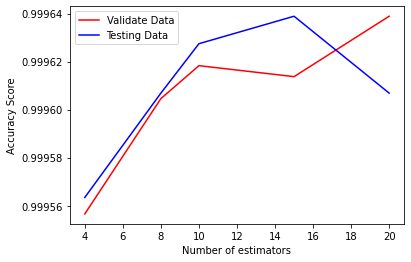

In [16]:
from sklearn.ensemble import AdaBoostClassifier

test_plot = []
validate_plot = []
for i in arr:
  model = AdaBoostClassifier(n_estimators=i,base_estimator = DecisionTreeClassifier(max_depth = 15,criterion = "entropy"))
  model = model.fit(X_train,Y_train)
  pred_validate = model.predict(X_validate)
  pred_test = model.predict(X_test)
  accuracy_score_validate = accuracy_score(Y_validate,pred_validate)
  recall_score_validate = recall_score(Y_validate,pred_validate,average = "micro")
  precision_score_validate = precision_score(Y_validate,pred_validate,average = "micro")
  accuracy_score_test = accuracy_score(Y_test,pred_test)
  recall_score_test = recall_score(Y_test,pred_test,average = "micro")
  precision_score_test = precision_score(Y_test,pred_test,average = "micro")
  validate_plot.append(accuracy_score_validate)
  test_plot.append(accuracy_score_test)
  print("Accuracy Score For Validate (number of estimators = " + str(i) + ") : " + str(accuracy_score_validate))
  print("Precision Score For Validate (number of estimators = " + str(i) + ") : " + str(precision_score_validate))
  print("Recall Score For Validate (number of estimators = " + str(i) + ") : " + str(recall_score_validate))
  print("Accuracy Score For Test (number of estimators = " + str(i) + ") : " + str(accuracy_score_test))
  print("Precision Score For Test (number of estimators = " + str(i) + ") : " + str(precision_score_test))
  print("Recall Score For Test (number of estimators = " + str(i) + ") : " + str(recall_score_test))
  print()
plt.xlabel("Number of estimators")
plt.ylabel("Accuracy Score")
plt.plot(arr,validate_plot,'r',label = "Validate Data")
plt.plot(arr,test_plot,'b',label = "Testing Data")
plt.legend()
